In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zepid
from zepid.graphics import EffectMeasurePlot

In [23]:
def plot_forest_plot(grs, title, fname=None):
    
    # Load the datasets
    df_iceberg = pd.read_csv(
        'Revision/Johann/Main updated analyses/Iceberg/table.csv',
        sep=',', index_col=0
    )
    df_iceberg.index = [x.split('.')[0] for x in df_iceberg.index]
    
    df_lcc = pd.read_csv(
        'Revision/Manuela/Main updated analyses/LCC/LCC_MoCA_results_updated.tab',
        sep='\t', index_col=0
    )
    
    df_pdbp = pd.read_csv(
        'Revision/Manuela/Main updated analyses/PDBP/PDBP_MoCA_results_updated.tab',
        sep='\t', index_col=0
    )
    
    df_ppmi = pd.read_csv(
        'Revision/Manuela/Main updated analyses/PPMI/PPMI_MoCA_results_updated.tab',
        sep='\t', index_col=0
    )
    
    df_sure = pd.read_csv(
        'Revision/Manuela/Main updated analyses/Sure/Sure_MoCA_results_updated.tab',
        sep='\t', index_col=0
    )
    
    df_meta = pd.read_csv(
        'Revision/Results/Main updated analyses/Meta_analysis_MoCA.tab', sep='\t', index_col=0
    )
    df_meta['Coefficient'] = df_meta['Coefficient (95% CI)'].apply(
        lambda x: float(x.split('[')[0].split(' ')[0])
    )

    df_meta['Lower bound (95% CI)'] = df_meta['Coefficient (95% CI)'].apply(
        lambda x: float(x.split('[')[1].split(' ')[0])
    )

    df_meta['Upper bound (95% CI)'] = df_meta['Coefficient (95% CI)'].apply(
        lambda x: float(x.split('[')[1].split(' ')[2][:-1])
    )

    # Labels
    labs = ["Iceberg", "PPMI", "LCC", "PDBP", "Sure", "Meta-analysis"]

    measure = ['{:.3f}'.format(df.loc[grs, 'Coefficient'])
               for df in (df_iceberg, df_ppmi, df_lcc, df_pdbp, df_sure, df_meta)]
    lower = ['{:.3f}'.format(df.loc[grs, 'Lower bound (95% CI)'])
             for df in (df_iceberg, df_ppmi, df_lcc, df_pdbp, df_sure, df_meta)]
    upper = ['{:.3f}'.format(df.loc[grs, 'Upper bound (95% CI)'])
             for df in (df_iceberg, df_ppmi, df_lcc, df_pdbp, df_sure, df_meta)]

    p = EffectMeasurePlot(label=labs, effect_measure=measure, lcl=lower, ucl=upper)
    p.labels(effectmeasure='Effect size')
    p.colors(pointshape="D")
    
    min_value = int(np.floor(np.min(np.asarray(lower).astype('float64'))))
    max_value = int(np.ceil(np.max(np.asarray(upper).astype('float64'))))

    ax = p.plot(figsize=(9,3), t_adjuster=0.06, max_value=max_value, min_value=min_value)

    plt.suptitle(title, fontsize=16)
    ax.set_xticks([min_value, 0, max_value])
    ax.set_xticklabels([min_value, 0, max_value])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)

    ax.text(min_value / 2, len(measure) + 1.2, 'Risk factor', ha='center', fontsize=10)
    ax.text(max_value / 2, len(measure) + 1.2, 'Protective factor', ha='center', fontsize=10)

    ax.vlines(0, -1, 7, color='k')
    ax.lines[0].remove()

    if isinstance(fname, str):
        plt.savefig(f'{fname}.png', bbox_inches='tight', facecolor='white', transparent=False, dpi=600)

    return ax

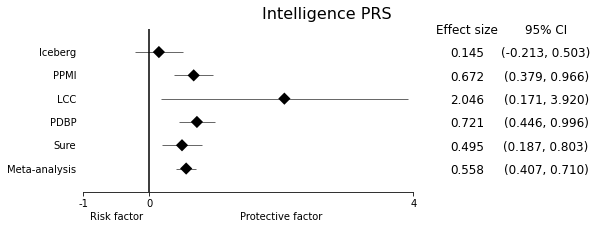

In [25]:
ax = plot_forest_plot(
    'GRS__savage_2018__intelligence', 'Intelligence PRS',
    'Revision/Forest plots/intelligence'
)

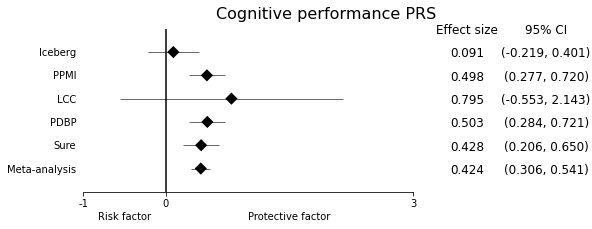

In [26]:
ax = plot_forest_plot(
    'GRS__lee_2018__cognitive_performance', 'Cognitive performance PRS',
    'Revision/Forest plots/cognitive_performance'
)

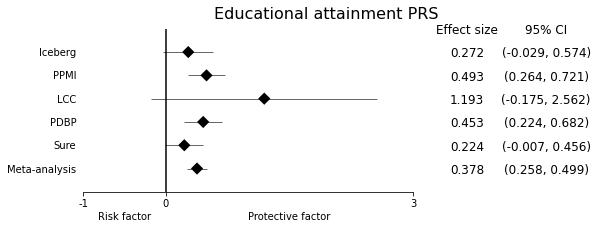

In [27]:
ax = plot_forest_plot(
    'GRS__lee_2018__educational_attainment', 'Educational attainment PRS',
    'Revision/Forest plots/educational_attainment'
)

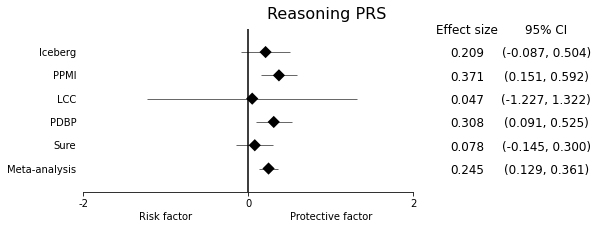

In [28]:
ax = plot_forest_plot(
    'GRS__davies_2016__reasoning', 'Reasoning PRS',
    'Revision/Forest plots/reasoning'
)